<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>
                    Изучение данных из файла
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;</span>
                    Исследовательский анализ данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Построение-модели-прогнозирования-оттока-пользователей" data-toc-modified-id="Построение-модели-прогнозирования-оттока-пользователей-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;</span>
                    Построение модели прогнозирования оттока пользователей
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Кластеризация-пользователей" data-toc-modified-id="Кластеризация-пользователей-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;</span>
                    Кластеризация пользователей
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">6&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Рекомендации" data-toc-modified-id="Рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>
                    Рекомендации
                </a>
            </span>
        </li>
    </ul>
</div>

# Прогноз оттока клиентов фитнес-центров

**Описание проекта**

Сеть фитнес-центров разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Главная проблема — это отток клиентов. Будем считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 

**Цель исследования**  

Провести анализ и подготовить план действий по удержанию клиентов.
А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами.

**Описание данных**  

Таблица `gym_churn`:
1) 'Churn' — факт оттока в текущем месяце. Churn = 1 - отток (человек перестал ходить в фитнес-центр)

2) Данные пользователя за предыдущий до проверки факта оттока месяц:
* 'gender' — пол
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* 'Phone' — наличие контактного телефона
* 'Age' — возраст
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

3) Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
* 'Group_visits' — факт посещения групповых занятий
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон


## Изучение данных из файла

Импортируем библиотеки, которые пригодятся нам для работы.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from itertools import combinations

Откроем файл с данными `gym_churn.csv` и изучим общую информацию:

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
    
display(data.shape)
display(data.head())
data.info()

(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**Вывод:**  
Датафрейм состоит из 4000 наблюдений и 14 полей, из которых 13 признаков и 1 целевая переменная `Сhurn` (факт оттока посетителей). При `Сhurn` = 1 считаем, что произошел отток, то есть пользователь перестал ходить в фитнес-центр. Все признаки численные, пропусков нет.

## Исследовательский анализ данных

Посмотрим на средние значения и стандартные отклонения по всем столбцам.

In [3]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [4]:
data_groupby_churn = data.groupby('Churn')
data_groupby_churn.mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [5]:
data_groupby_churn.median()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,1.0,1.0,1.0,0.0,1.0,6.0,0.0,30.0,149.881171,6.0,4.0,2.043252,2.046697
1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,27.0,103.814686,1.0,1.0,1.491187,0.979445


In [6]:
data.groupby('Churn').agg(['mean', 'median']).T

Churn                                              0           1
gender                            mean      0.510037    0.510839
                                  median    1.000000    1.000000
Near_Location                     mean      0.873086    0.768143
                                  median    1.000000    1.000000
Partner                           mean      0.534195    0.355325
                                  median    1.000000    0.000000
Promo_friends                     mean      0.353522    0.183789
                                  median    0.000000    0.000000
Phone                             mean      0.903709    0.902922
                                  median    1.000000    1.000000
Contract_period                   mean      5.747193    1.728558
                                  median    6.000000    1.000000
Group_visits                      mean      0.464103    0.268615
                                  median    0.000000    0.000000
Age                               mean     29.976523   26.989632
                                  median   30.000000   27.000000
Avg_additional_charges_total      mean    158.445715  115.082899
                                  median  149.881171  103.814686
Month_to_end_contract             mean      5.283089    1.662582
                                  median    6.000000    1.000000
Lifetime                          mean      4.711807    0.990575
                                  median    4.000000    1.000000
Avg_class_frequency_total         mean      2.024876    1.474995
                                  median    2.043252    1.491187
Avg_class_frequency_current_month mean      2.027882    1.044546
                                  median    2.046697    0.979445

Вывод:  
Средние значения для признаков `gender` и `phone` получились одинаковыми (0.51 и 0.9 соответственно). Для остальных признаков значения для двух групп раличаются.

Построим столбчатые гистограммы по каждому признаку для тех, кто ушёл (`Churn` = 1) и тех, кто остался (`Churn` = 0):

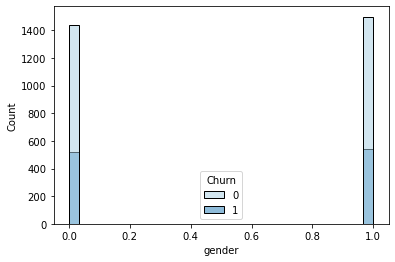

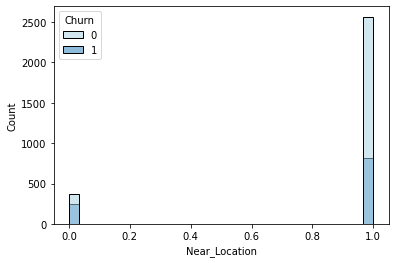

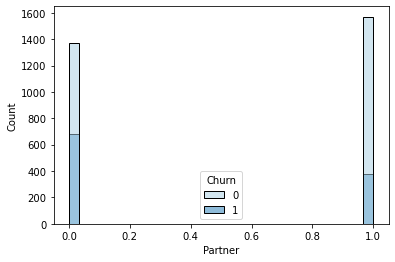

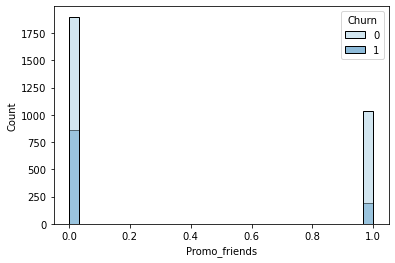

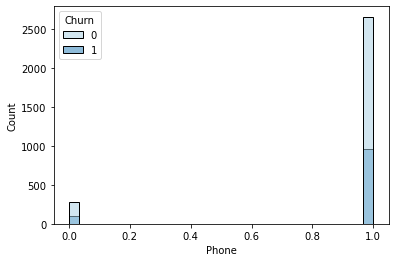

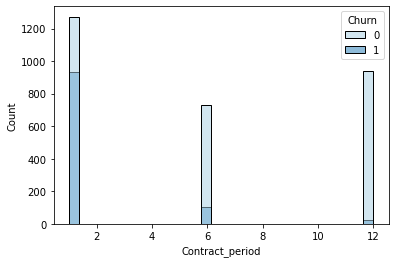

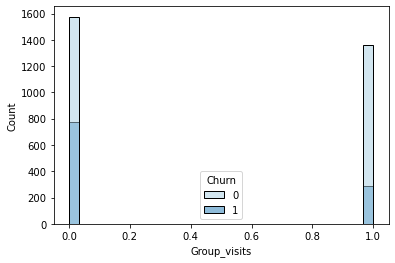

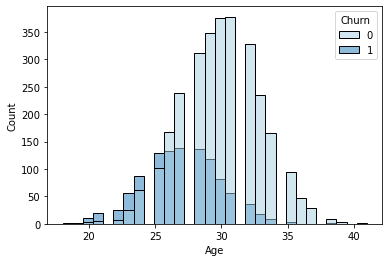

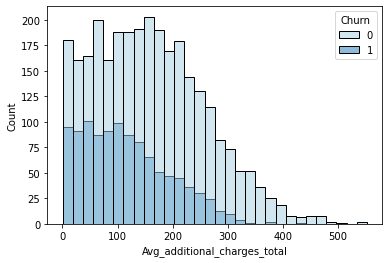

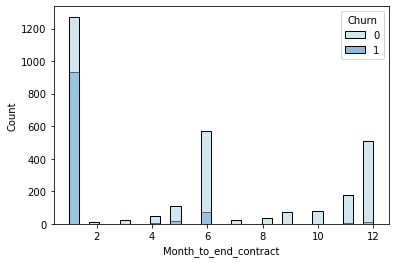

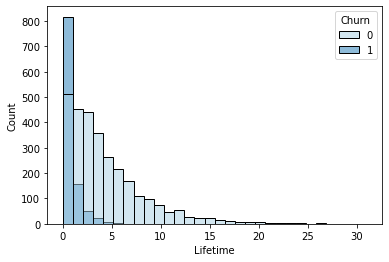

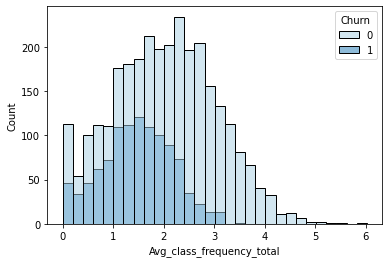

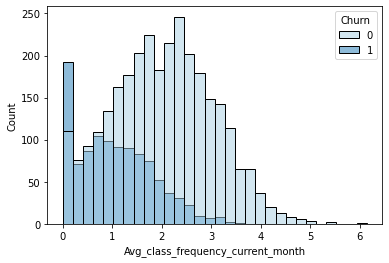

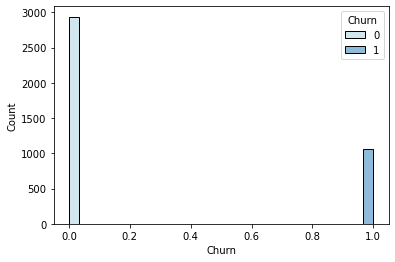

In [7]:
for feature in data.columns:
    sns.histplot(data=data, x=feature, hue='Churn', bins=30, palette='Paired')
    plt.show()

Вывод:
1) Для мужчин и женщин отток распределился одинаково. Получается, что от признака `Gender` отток не зависит. 
2) Для признака `Near Location` отток гораздо меньше (примерно в 5 раз) для тех, кто живет или работает в районе, где находится фитнес-центр.  
3) По признаку `Partner` отток меньше для тех компаний, чьи сотрудники могут получать скидку на абонемент.  
4) Для признака `Promo_friends` отток тоже примерно одинаковый для 2 групп.  
5) Пользователей, указавших контактный телефон (признак `Phone`) гораздо больше, чем тех, кто его не указал. Среди тех, кто указал, больше пльзователей осталось в фитнес-центре.  
6) По признаку `Contract_period` сформировалось 3 группы: те, у кого длительность текущего действующего абонемента составляет 1 месяц, 6 месяцев и год. Наименьший отток среди пользователей с абонементом на год.
7) Признак `Group_visits`. Отток меньше среди тех, кто посещает групповые занятия.  
8) Графики для признака `Age` похожи на нормальное стандартное распределение. Максимум оттока достигается для людей в возрасте 25-29 лет. При этом среди людей 28-35 лет все равно больше тех, кто продолжает ходить в фитнес-центр.  
9) Суммарная выручка от других услуг фитнес-центра (признак `Avg_additional_charges_total`) имеет скошенное влево распределение. Для пользователей, которые тратят от 0 до 100, число ушедших и оставшихся примерно одинаковое. Зато для пользователей, которые тратят больше 100 на доп услуги число оставшихся превышает число ушедших и чем больше человек тратит, тем больше шансов, что он продолжит ходить в фитнес-центр.  
10) Признак `Month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах). По графику видно, что, если человеку остался всего 1 месяц до конца абонемента, то больше шансов, что он перестанет заниматься. Среди тех, кому до окончания срока абонемента остается еще 6 или больше месяцев, оттока почти нет.  
11) Признак `Lifetime` - время с момента первого обращения в фитнес-центр (в месяцах). Если пользователь в первый месяц не пришел в фитнес-центр, то скорее всего он уже и не придет.  
12) Признак `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента. Пользователи, которые приходят заниматься больше 1 раза в неделю, имеют меньше шансов перейти в группу оттока.  
13) Признак `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц. Если в предыдущем месяце человек ни разу не пришел в фитнес-центр, то он, скорее всего, уже и не придет.  
14) Факт оттока `Churn`. В целом видно, что факт оттока в 3 раза меньше, чем факт того, что пользователь будет ходить в фитнес-центр.

Построим матрицу корреляций:

In [8]:
cm = data.corr()
cm

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Нарисуем тепловую карту с подписями для матрицы корреляций:

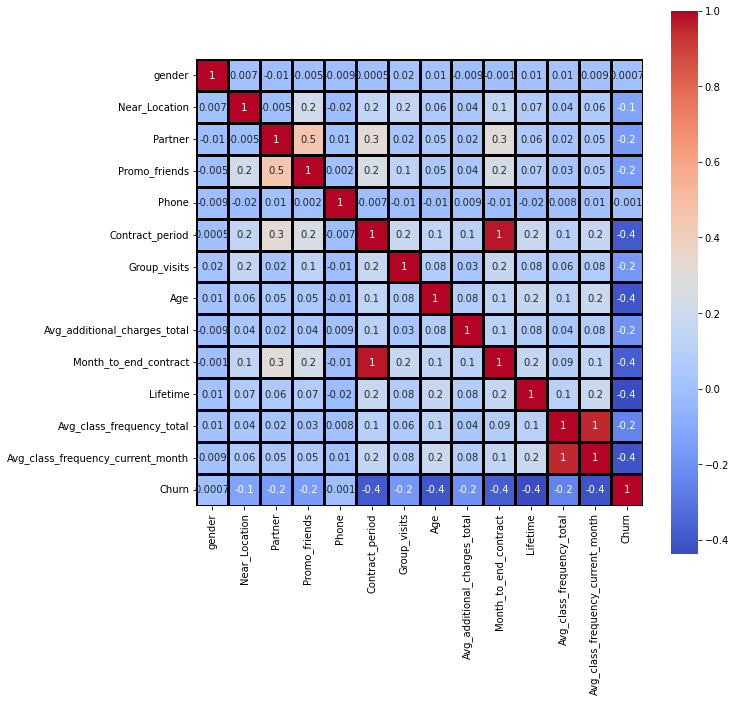

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, square=True, fmt='.1g', cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

По графику видно, что у нас нет признаков, которые бы хорошо коррелировали с целевой переменной `Churn`. Зато есть признаки, которые очень сильно коррелируют между собой. Это `Month_to_end_contract` и `Contract_period`, `Avg_class_frequency_current_month` и `Avg_class_frequency_total`. Коэффициент корреляции между ними равен 1, значит, в дальнейшем с логистической регрессией у нас возникнут проблемы, мы получим нерепрезентативные веса и переобученную под эти признаки модель.

Удалим признаки `Month_to_end_contract` и `Avg_class_frequency_current_month`:

In [10]:
data = data.drop(columns=['Month_to_end_contract', 'Avg_class_frequency_current_month'])
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.284497,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1.277168,1
3997,1,1,1,1,1,12,0,28,78.250542,2,2.786146,0
3998,0,1,1,1,1,6,0,32,61.912657,3,1.630108,0


**Вывод:**  
1) Посчитали средние значения для всех признаков. Для `gender` и `phone` значения получились одинаковыми (0.51 и 0.9 соответственно). Для остальных признаков значения для двух групп раличаются.  
2) Построили столбчатые гистограммы по каждому признаку для тех, кто ушёл (Churn = 1) и тех, кто остался (Churn = 0). По гистограммам определили особенности для каждого признака.  
3) Построили матрицу корреляций и нарисовали для неё тепловую карту, по которой определили, что у нас нет признаков, которые бы хорошо коррелировали с целевой переменной `Churn`. Зато есть признаки, которые очень сильно коррелируют между собой. Это `Month_to_end_contract` и `Contract_period`, `Avg_class_frequency_current_month` и `Avg_class_frequency_total`. Удалили по 1 признаку из группы для дальнейшего построения модели.

## Построение модели прогнозирования оттока пользователей

Построим модель бинарной классификации пользователей, где целевой признак `Churn` (факт оттока пользователя в следующем месяце).

Сначала разделим наши данные на обучающую и валидационную выборку функцией train_test_split():

In [11]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('Churn', axis=1)
y = data['Churn']
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [12]:
#Код ревьюера

print(X_train.shape, X_test.shape)

(3200, 11) (800, 11)


Теперь обучим модель на train-выборке двумя способами:
* логистической регрессией 
* случайным лесом 

In [13]:
# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Отдельно определим функцию, которая будет выводить наши метрики:

In [14]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [15]:
# задаем алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучаем модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

# задаем алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучаем модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# выводим все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77


**Вывод:**  
Построили модель бинарной классификации пользователей, где целевой признак Churn (факт оттока пользователя в следующем месяце), обучили модель на train-выборке двумя способами (логистической регрессией и случайным лесом). Выяснили, что для модели логистической регресии все метрики дают чуть лучший результат, чем для модели случайного леса.

## Кластеризация пользователей

Проведем кластеризацию пользователей.

1) Для начала стандартизируем данные:

In [16]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

2) Теперь построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму:

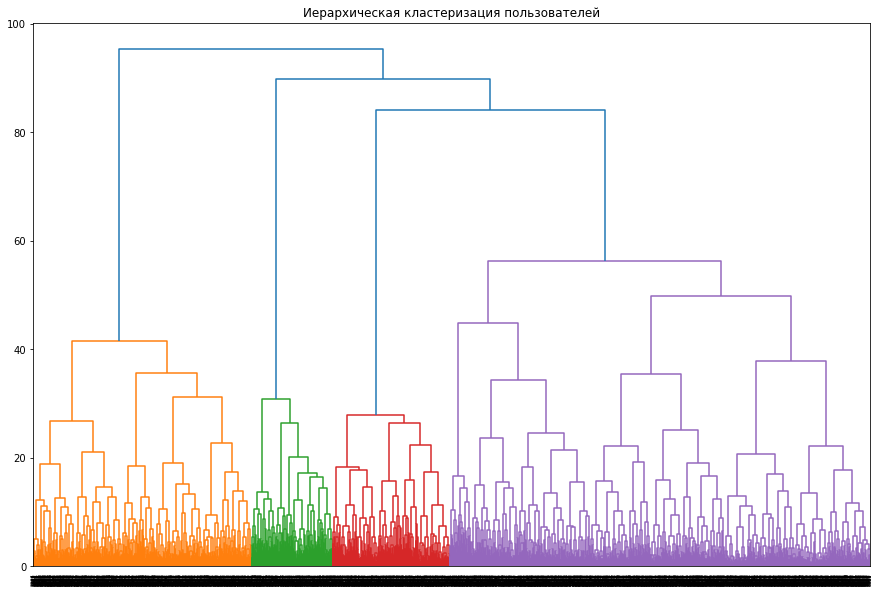

In [17]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация пользователей')
plt.show()

На основании полученного графика можно выделить 4 кластера.

3) Далее обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы наши результаты можно было сравнивать с результатами остальных студентов.

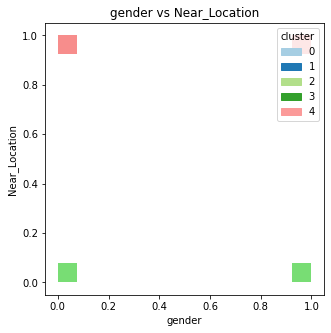

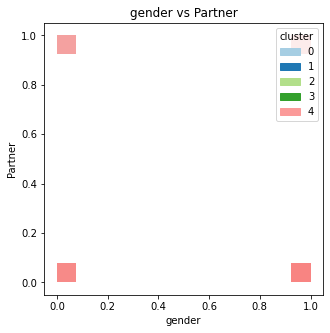

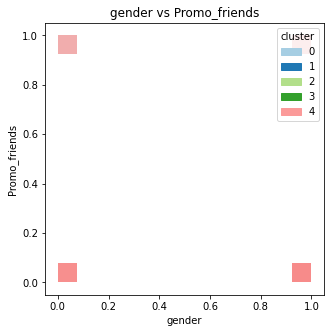

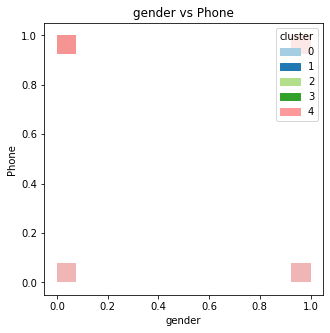

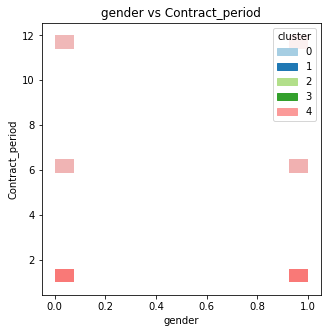

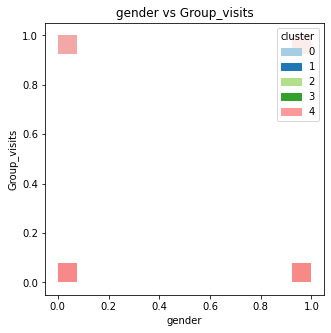

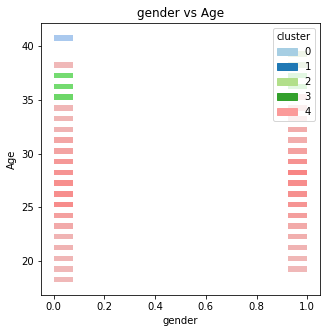

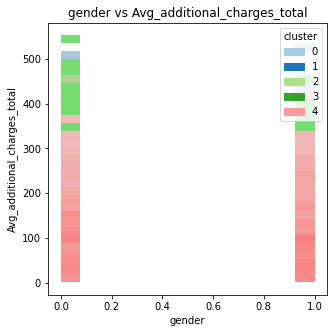

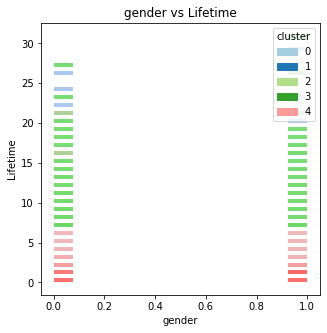

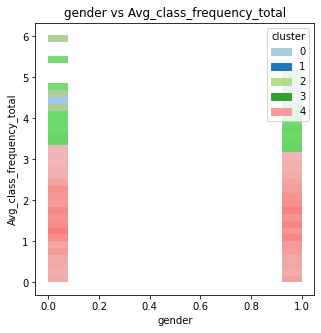

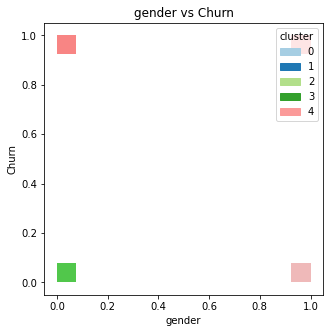

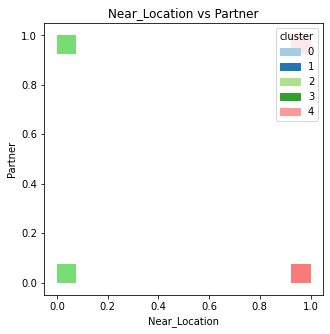

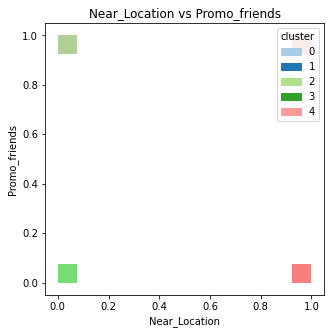

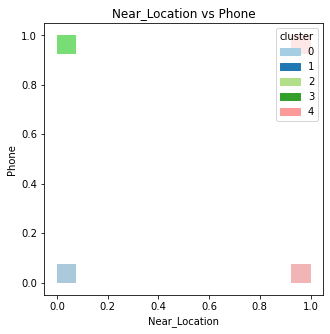

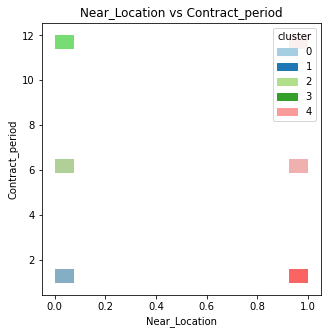

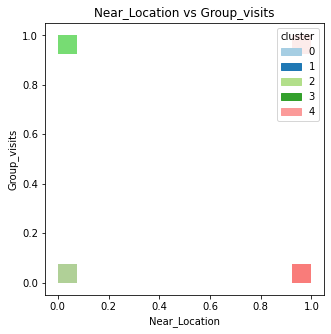

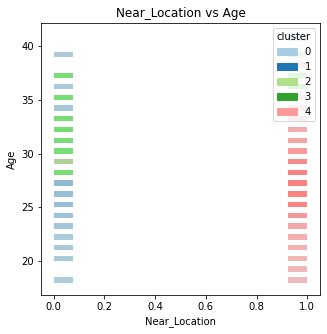

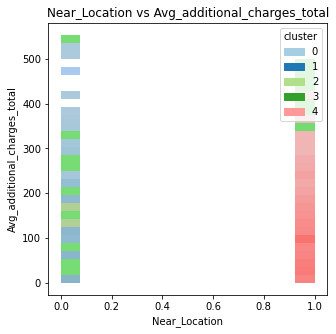

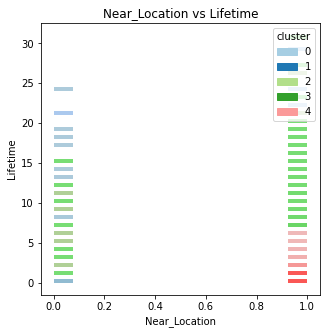

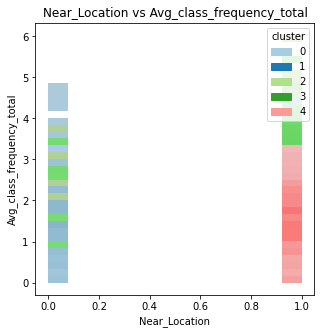

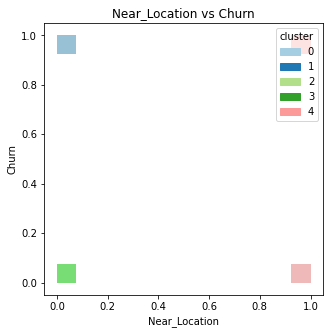

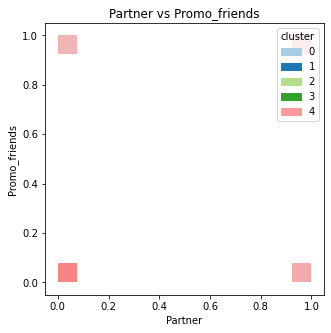

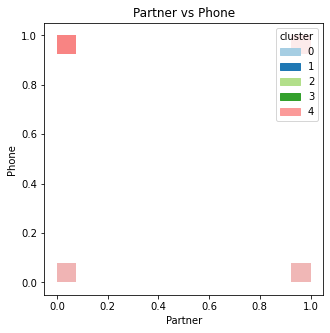

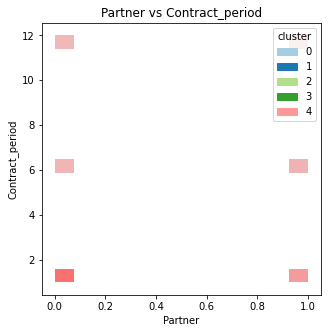

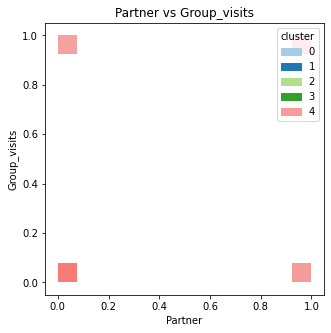

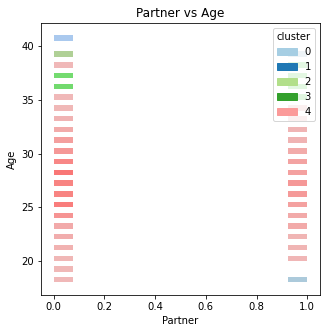

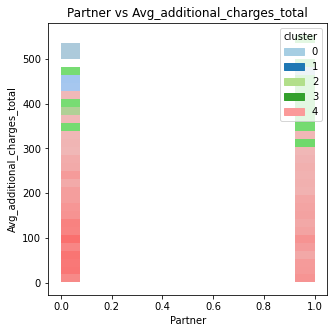

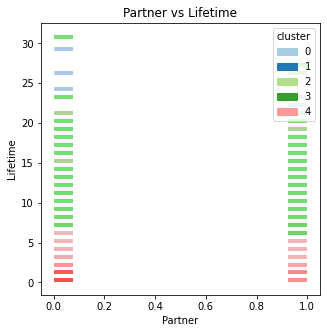

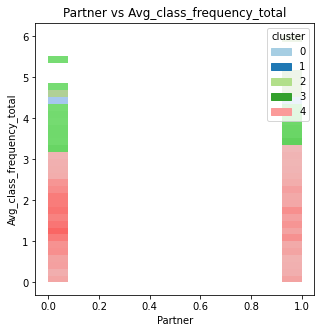

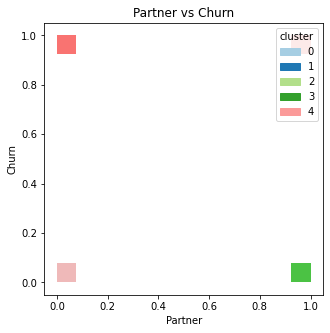

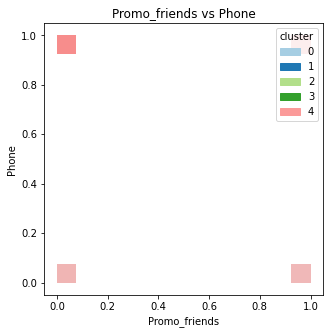

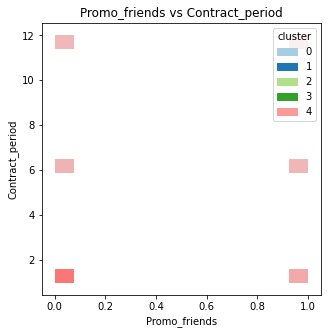

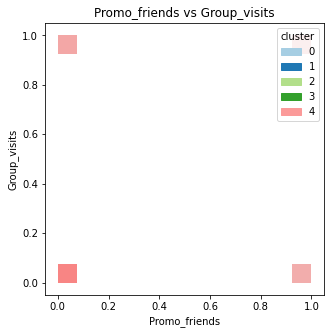

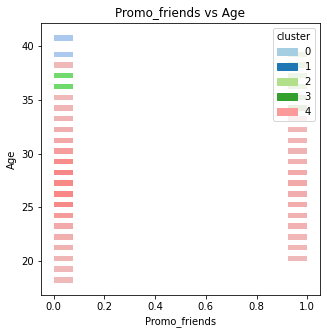

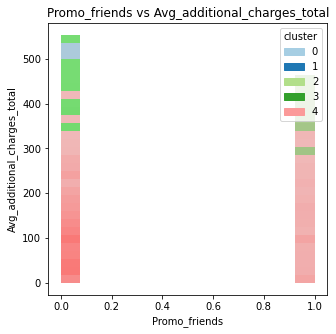

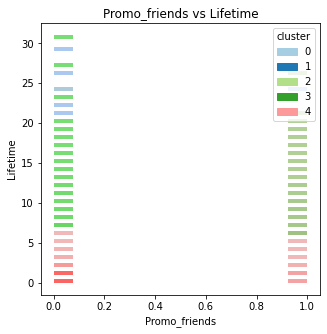

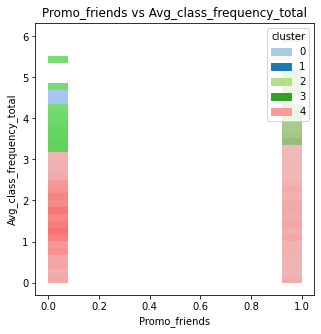

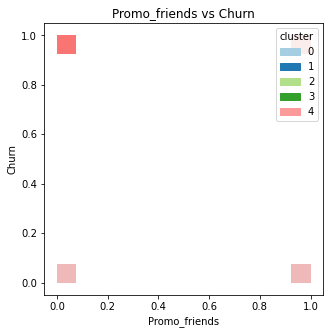

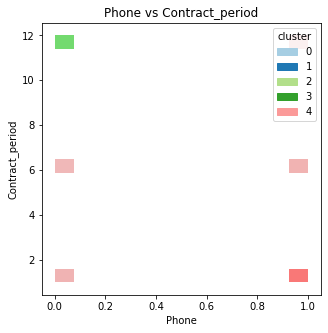

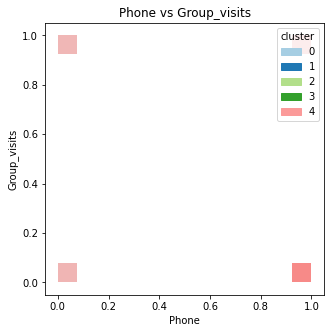

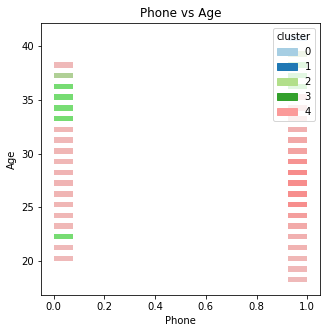

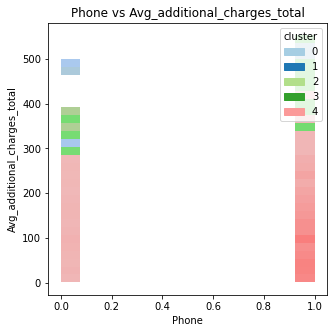

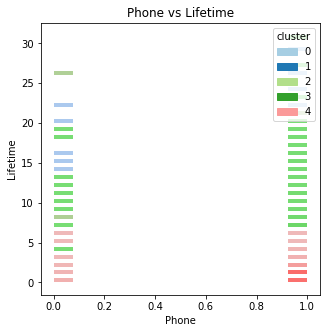

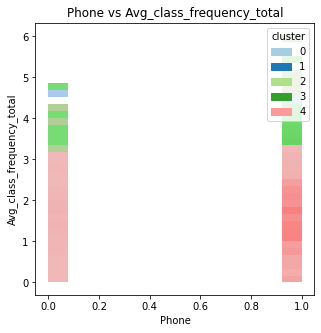

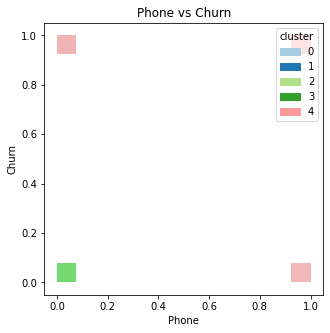

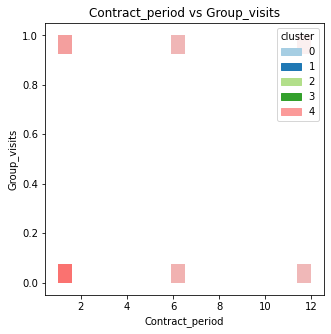

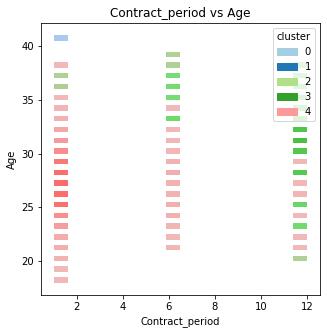

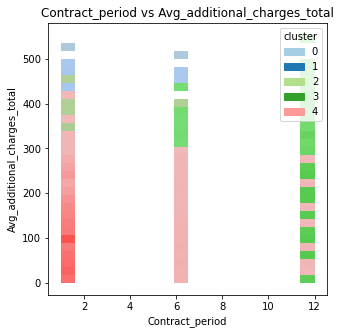

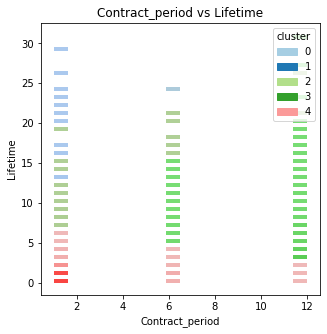

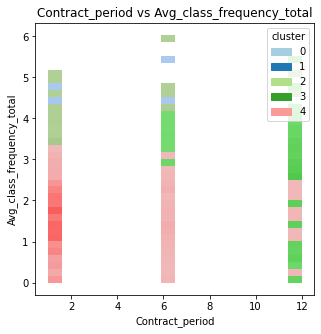

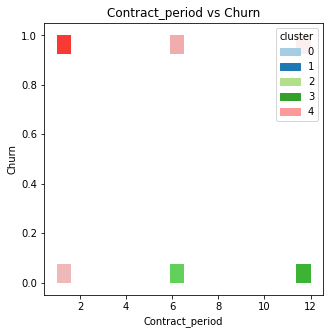

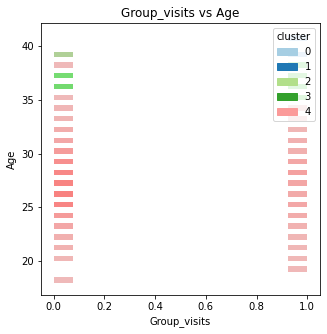

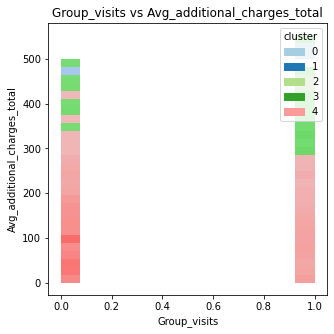

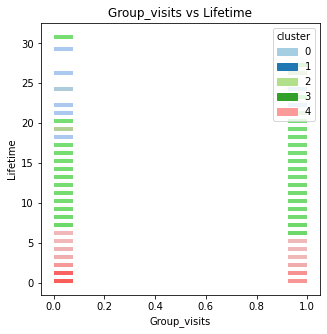

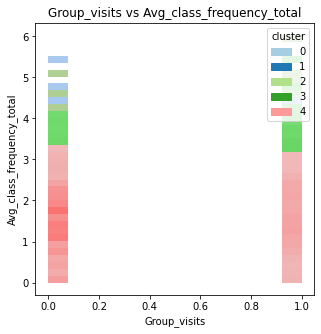

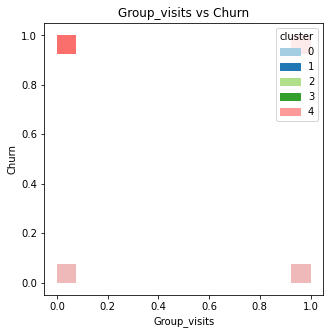

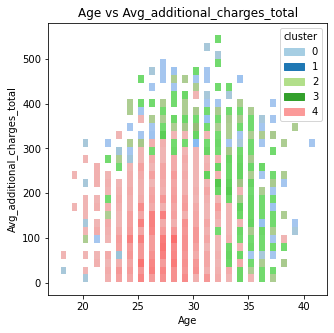

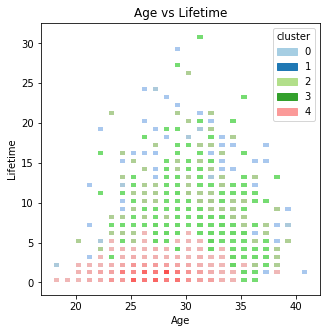

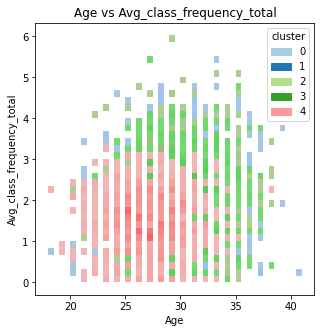

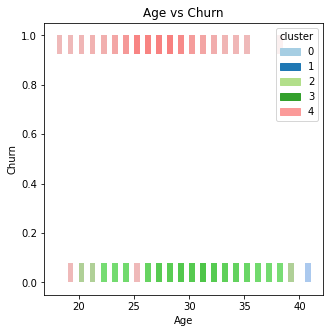

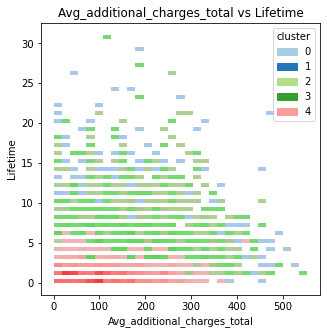

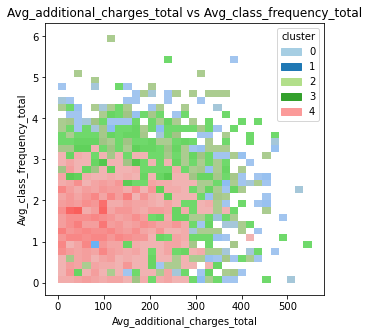

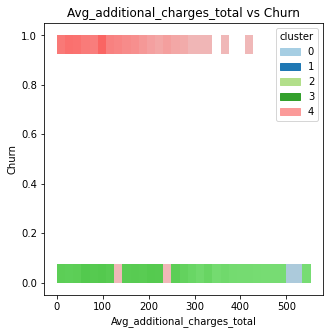

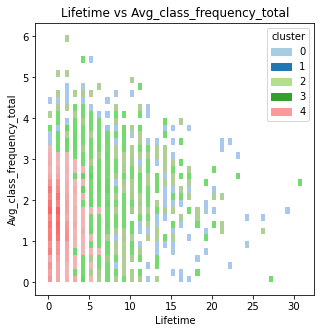

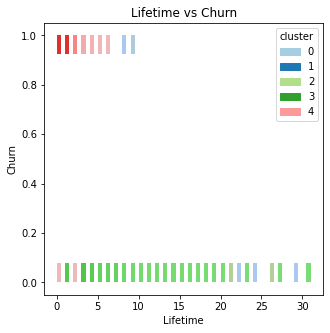

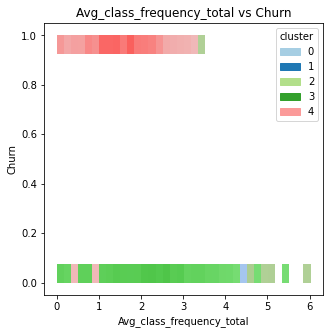

In [18]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(data, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.histplot(data=data, x=x_name, y=y_name, hue=cluster_name, palette='Paired'
        #data[x_name], data[y_name], hue=data[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
    
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(data)

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster'] = labels

# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(combinations(data.drop('cluster', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], pair[1], 'cluster')

4) Посмотрим на средние значения признаков для кластеров:

In [19]:
print(data.groupby('cluster').mean())

           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.501661       0.000000  0.481728       0.071429  0.911960   
1        0.522936       0.999083  0.161468       0.074312  0.902752   
2        0.503205       0.992521  0.916667       1.000000  0.903846   
3        0.502627       0.984238  0.626970       0.000000  0.900175   
4        0.513109       1.000000  0.330836       0.217228  0.900125   

         Contract_period  Group_visits        Age  \
cluster                                             
0               2.872093      0.224252  28.652824   
1               2.068807      0.450459  30.055963   
2               7.827991      0.544872  29.950855   
3              10.623468      0.492119  29.996497   
4               1.682896      0.289638  26.922597   

         Avg_additional_charges_total  Lifetime  Avg_class_frequency_total  \
cluster                                             

Средние значения для признаков gender, Near_Location, Phone примерно одинаковы для всех кластеров.

5) Для каждого полученного кластера посчитаем долю оттока (методом groupby()). 

In [20]:
data_cluster = data.groupby('cluster')['Churn'].sum().reset_index()
display(data['Churn'].sum())
data_cluster['% churn'] = (data_cluster['Churn']/data['Churn'].sum()) * 100
data_cluster

1061

,cluster,Churn,% churn
0,0,246,23.185674
1,1,2,0.188501
2,2,11,1.036758
3,3,3,0.282752
4,4,799,75.306315


Наибольшая доля оттока получилась у 4 кластера. Самые надежные - это 1, 2 и 3 кластеры.

**Вывод:**  
1) Построили матрицу расстояния на стандартизованной матрице признаков и нарисовали дендрограмму. На основании полученного графика выявили 4 кластера.  
2) Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов (число кластеров n=5).  
3) Выяснили, что средние значения для признаков `gender`, `Near_Location`, `Phone` примерно одинаковы для всех кластеров.  
4) Наибольшая доля оттока получилась у 4 кластера. Самые надежные - это 1, 2 и 3 кластеры.

## Общий вывод

1) Определили, что датафрейм состоит из 4000 наблюдений и 14 полей, из которых 13 признаков и 1 целевая переменная `Сhurn` (факт оттока посетителей).  
2) Выяснили, что отток посетителей не зависит от пола (признак `gender`).  
3) На отток больше всего влияет признак `Lifetime` - время с момента первого обращения в фитнес-центр (в месяцах). Если пользователь в первый месяц не пришел в фитнес-центр, то скорее всего он уже и не придет.  
4) Для признака `Near Location` отток гораздо меньше (примерно в 5 раз) для тех, кто живет или работает в районе, где находится фитнес-центр.  
5) По признаку `Partner` отток меньше для тех компаний, чьи сотрудники могут получать скидку на абонемент.  
6) Для признака `Promo_friends` отток тоже примерно одинаковый для 2 групп.  
7) Наименьший отток среди пользователей с абонементом на год.  
8) Признак `Group_visits`. Отток меньше среди тех, кто посещает групповые занятия.  
9) Для пользователей, которые тратят больше 100 на доп услуги, число оставшихся превышает число ушедших и, чем больше человек тратит, тем больше шансов, что он продолжит ходить в фитнес-центр.  
10) Для признака `Month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах) видно, что, если человеку остался всего 1 месяц до конца абонемента, то больше шансов, что он перестанет заниматься. Среди тех, кому до окончания срока абонемента остается еще 6 или больше месяцев, оттока почти нет.  
11) Признак `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц. Если в предыдущем месяце человек ни разу не пришел в фитнес-центр, то он, скорее всего, уже и не придет.  
12) Выяснили, что для модели логистической регресии все метрики дают чуть лучший результат, чем для модели случайного леса.  
13) Построили матрицу расстояния на стандартизованной матрице признаков и нарисовали дендрограмму. На основании полученного графика выявили 4 кластера.    
14) Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов (число кластеров n=5).  
15) Выяснили, что средние значения для признаков `gender`, `Near_Location`, `Phone` примерно одинаковы для всех кластеров.  
16) Наибольшая доля оттока получилась у 4 кластера. Самые надежные - это 1, 2 и 3 кластеры.

## Рекомендации

1) Можно совсем убрать абонемент на месяц, так как выгоднее продавать больше долгосрочных абонементов (на полгода или год).  
2) Для клиентов, которые пришли впервые, можно сделать какие-нибудь акции. Например, первые 2 занятия по цене 1.  
3) Стоит начать обращать внимание на посещаемость клиентов. Тем, кто занимается индивидуально, предлагать разные виды групповых занятий, чтобы удержать их надольше. Возможно, провести день открытых дверей, чтобы люди попробовали разные виды тренировок бесплатно.  
4) Предлагать пользователям больше разных доп услуг.